In [2]:
import os

import cv2 as cv

import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image

from zipfile import ZipFile
from urllib.request import  urlretrieve

%matplotlib inline

In [3]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)
URL = r"https://www.dropbox.com/s/qhhlqcica1nvtaw/opencv_bootcamp_assets_NB1.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB1.zip")

# Download if assest ZIP does not exists. 
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)   

In [4]:
Image(filename='checkerboard_18x18.png')

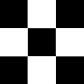

In [6]:
Image(filename='checkerboard_84x84.jpg')

## Reading Images using OpenCV

with `cv.imread()`

Flags

- cv2.IMREAD_GRAYSCALE or 0: Loads image in grayscale mode

- cv2.IMREAD_COLOR or 1: Loads a color image. Any transparency of image will be neglected. It is the default flag.

- cv2.IMREAD_UNCHANGED or -1: Loads image as such including alpha channel

In [7]:
img = cv.imread('checkerboard_18x18.png',0)

In [8]:
print(img)

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

## Display Image attributes

image attributes are size, data type

In [9]:
print(f"image size (h,w) is : {img.shape}")
print(f"image dtype is : {img.dtype}")

image size (h,w) is : (18, 18)
image dtype is : uint8


## Display images using matplotlib

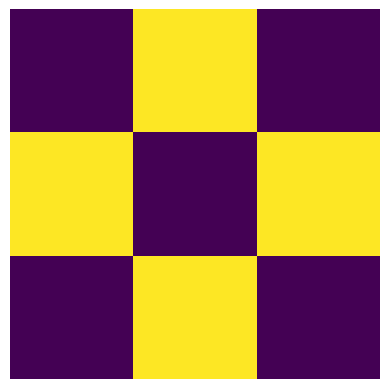

In [11]:
plt.imshow(img)
plt.axis('off')
plt.show()

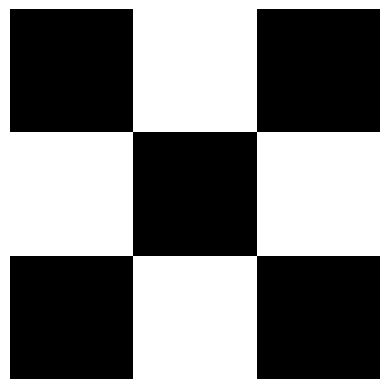

In [13]:
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

[[  0   0  15  20   1 134 233 253 253 253 255 229 130   1  29   2   0   0]
 [  0   1   5  18   0 137 232 255 254 247 255 228 129   0  24   2   0   0]
 [  7   5   2  28   2 139 230 254 255 249 255 226 128   0  27   3   2   2]
 [ 25  27  28  38   0 129 236 255 253 249 251 227 129   0  36  27  27  27]
 [  2   0   0   4   2 130 239 254 254 254 255 230 126   0   4   2   0   0]
 [132 129 131 124 121 163 211 226 227 225 226 203 164 125 125 129 131 131]
 [234 227 230 229 232 205 151 115 125 124 117 156 205 232 229 225 228 228]
 [254 255 255 251 255 222 102   1   0   0   0 120 225 255 254 255 255 255]
 [254 255 254 255 253 225 104   0  50  46   0 120 233 254 247 253 251 253]
 [252 250 250 253 254 223 105   2  45  50   0 127 223 255 251 255 251 253]
 [254 255 255 252 255 226 104   0   1   1   0 120 229 255 255 254 255 255]
 [233 235 231 233 234 207 142 106 108 102 108 146 207 235 237 232 231 231]
 [132 132 131 132 130 175 207 223 224 224 224 210 165 134 130 136 134 134]
 [  1   1   3   0   0 129

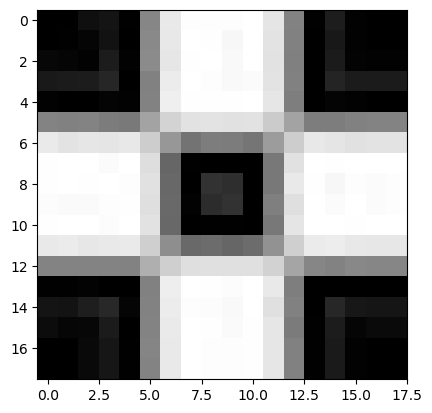

In [14]:
img2 = cv.imread('checkerboard_fuzzy_18x18.jpg',0)

print(img2)

plt.imshow(img2, cmap='gray')
plt.show()

## Color Images

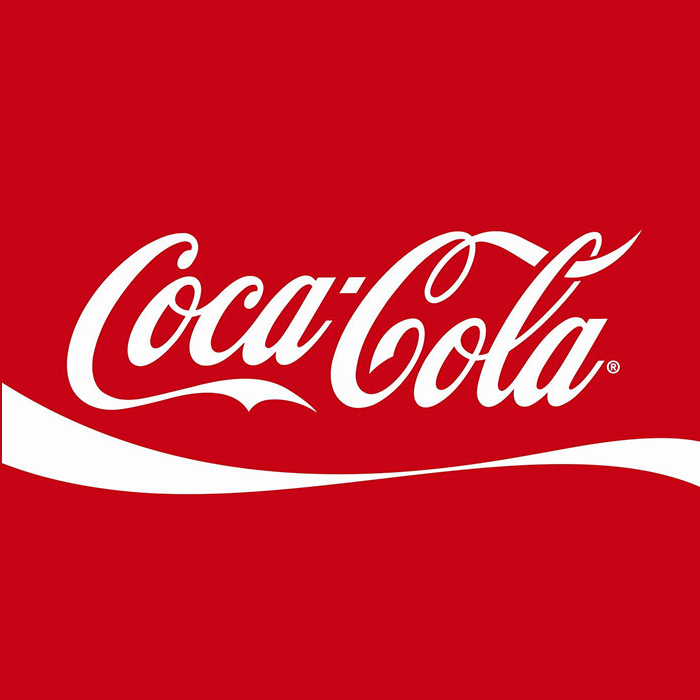

In [15]:
Image('coca-cola-logo.png')

### Read and display color images

In [17]:
coke_img = cv.imread('coca-cola-logo.png',1)

print(f'image size (h, w, c) is {coke_img.shape}')

print(f'data type of image is {coke_img.dtype}')

image size (h, w, c) is (700, 700, 3)
data type of image is uint8


### Display image

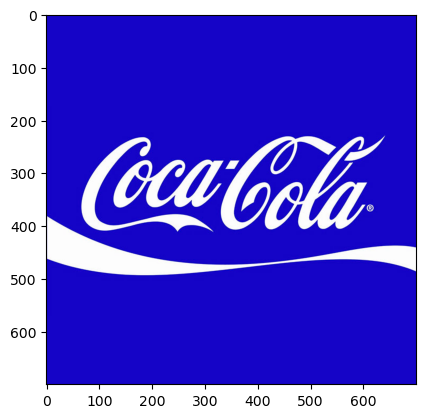

In [18]:
plt.imshow(coke_img);

the above image is blue color,

because matplotlib expects the image in RGB format.

whereas OpenCV stores images in BGR format

to display correctly, jus reverse the channels of the image

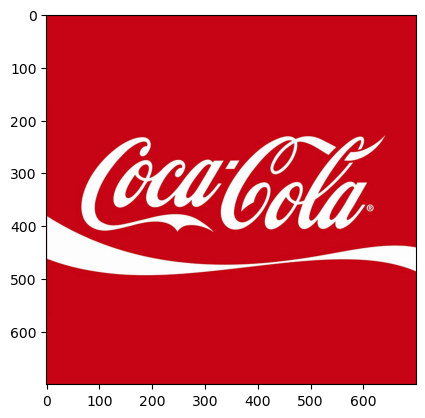

In [20]:
coke_img1 = coke_img[:, :, ::-1] # reversing channels B and R
plt.imshow(coke_img1);

## Splitting and Merging Color Channels

- use the `cv.split()` to divide multi channel array into single channel arrays.

- use the `cv.merge()` to merge single channel arrays to single multi-channel array.

- input matrices should have same size 

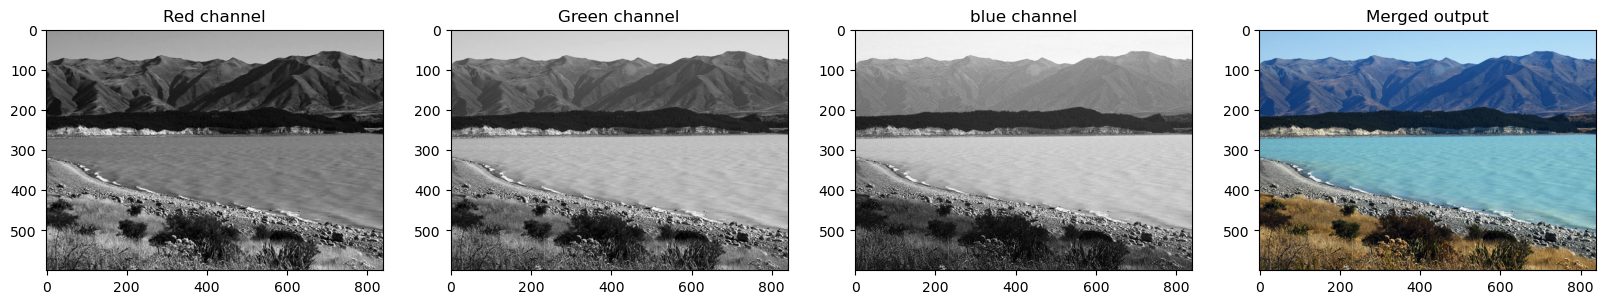

In [23]:
img3 = cv.imread('New_Zealand_Lake.jpg', cv.IMREAD_COLOR)
b,g,r = cv.split(img3)

merged_img = cv.merge((b,g,r))

fig, ax = plt.subplots(1,4,figsize=[20,5])

ax[0].imshow(r, cmap='gray')
ax[0].set_title('Red channel')
ax[1].imshow(g, cmap='gray')
ax[1].set_title('Green channel')
ax[2].imshow(b, cmap='gray')
ax[2].set_title('blue channel')
ax[3].imshow(merged_img[:, :, ::-1])
ax[3].set_title('Merged output')
plt.show()


the image is lake in new zealand,

in the red channel image, the water is more black than compared to green channel and blue channel, which is due to the absence of red color in that channel, similarly the other land scapes like mountans and land.

## Converting to different Color Spaces

- to convert an image from one color space to another we use the `cv.cvtColor()` function.

- in case of a transformation to-from RGB color space, the order of channels should be specified explicitly(RGB | BGR)

- default color format of OpenCV is BGR.

### BGR2RGB

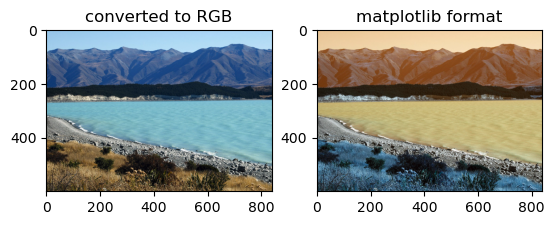

In [32]:
img4 = cv.cvtColor(img3, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(1,2)

ax[0].imshow(img4)
ax[0].set_title('converted to RGB')
ax[1].imshow(img3)
ax[1].set_title('matplotlib format')
plt.show()

### 2HSV

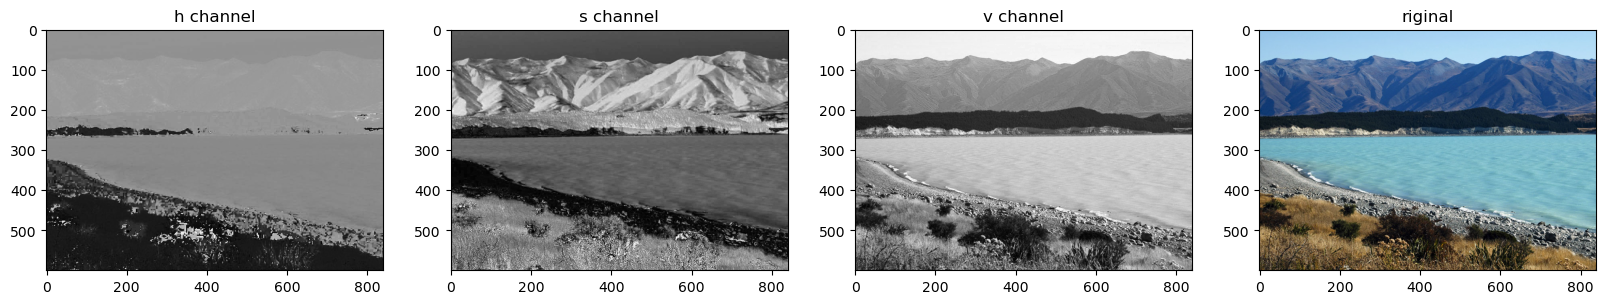

In [28]:
hsv_img = cv.cvtColor(img3, cv.COLOR_BGR2HSV)

h,s,v = cv.split(hsv_img)

fig, ax = plt.subplots(1,4,figsize=[20,5])

ax[0].imshow(h, cmap='gray')
ax[0].set_title('h channel')
ax[1].imshow(s, cmap='gray')
ax[1].set_title('s channel')
ax[2].imshow(v, cmap='gray')
ax[2].set_title('v channel')
ax[3].imshow(img3[:, :, ::-1])
ax[3].set_title('riginal')
plt.show()

- Hue channel (H):Displays grayscale variations that map to different colors. The variations will show which regions of the image correspond to red, green, blue, etc.

- Saturation channel (S):Bright regions represent areas with strong color intensity (e.g., rich reds, blues), while dark regions indicate low color intensity (e.g., whites, grays).


- Value channel (V): Bright regions indicate bright areas of the image, while dark regions correspond to shadows or darker areas in the image.

- hsv color space is often used in color segmentation tasks or filtering images based on color properties.

### Modifying individual channels


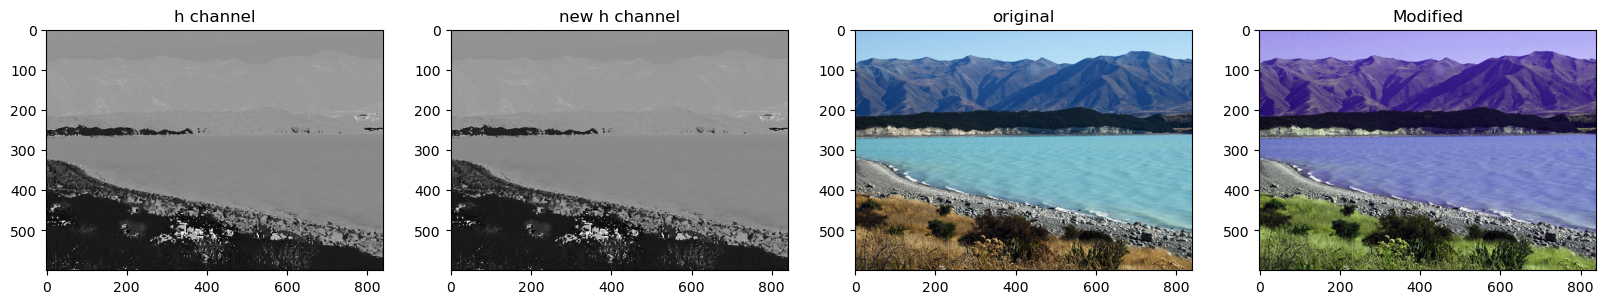

In [35]:
hnew = h+20

img_merged1 = cv.merge([hnew, s, v])
img_merged1_rgb = cv.cvtColor(img_merged1, cv.COLOR_HSV2RGB)

fig, ax = plt.subplots(1,4,figsize=[20,5])

ax[0].imshow(h, cmap='gray')
ax[0].set_title('h channel')
ax[1].imshow(hnew, cmap='gray')
ax[1].set_title('new h channel')
ax[2].imshow(img3[:,:,::-1])
ax[2].set_title('original')
ax[3].imshow(img_merged1_rgb)
ax[3].set_title('Modified')
plt.show()


## Saving images

- to save image using opencv use the `cv.imwrite()` function, wher ethe 1st arg is file name, 2nd arg is image you want to save.

- the image format is chosen based on the filename extension.

- generally, only 8-bit single-channel or  3-channel(BGR order) images can be saved using this function.

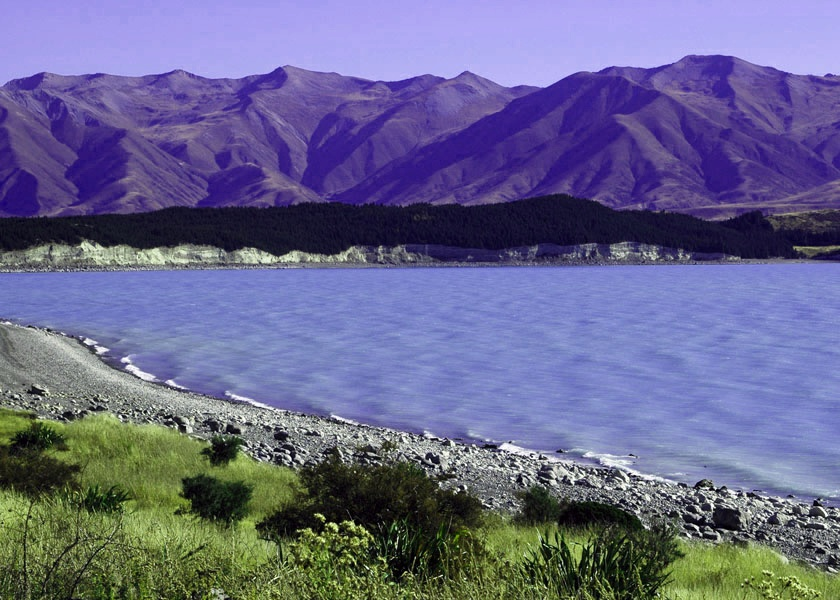

In [37]:
cv.imwrite('lake2.jpg', img_merged1_rgb[:, :, ::-1])
Image('lake2.jpg')

saved lake image shape: (600, 840, 3)


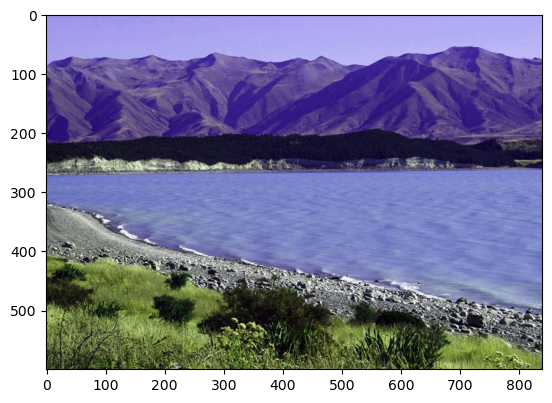

In [41]:
saved_lake_img = cv.imread('lake2.jpg', 1)
print(f"saved lake image shape: {saved_lake_img.shape}")
plt.imshow(saved_lake_img[:,:,::-1]);

saved lake image shape: (600, 840)


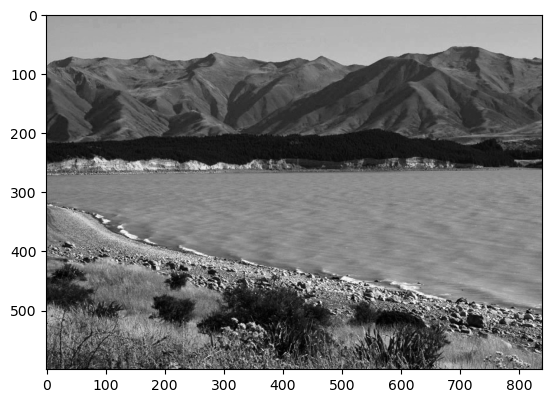

In [43]:
saved_lake_img1 = cv.imread('lake2.jpg', 0)
print(f"saved lake image shape: {saved_lake_img1.shape}")
plt.imshow(saved_lake_img1, cmap='gray');

## quiz practice

In [44]:
saved_lake_img1 = cv.imread('lake2.jpg', 0)

<class 'matplotlib.image.AxesImage'>


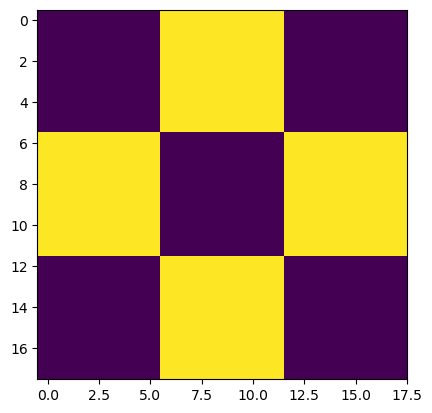

In [47]:
print(type(plt.imshow(img)))

In [48]:
blank = np.zeros(img.shape)

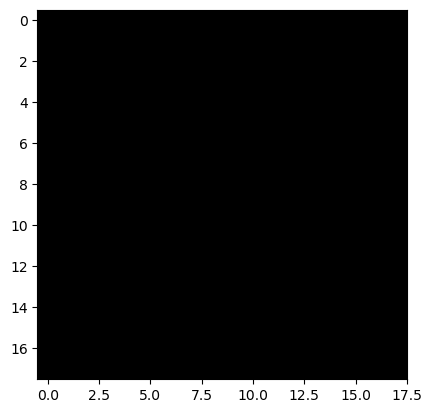

In [50]:
plt.imshow(blank, cmap='gray');

In [51]:
cv.imwrite('black.jpg', blank)

True

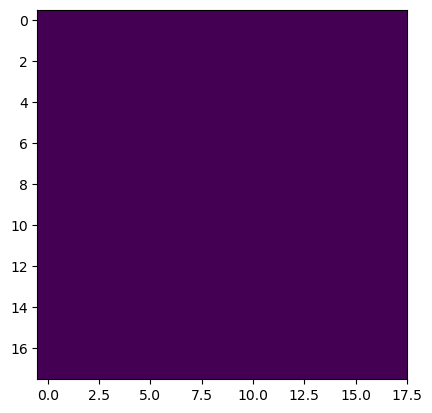

In [56]:
white = np.ones(img.shape)*255
plt.imshow(white[:,::-1])

In [58]:
cv.imwrite('black.jpg',white)

True